<a href="https://colab.research.google.com/github/17102005kavya/House-price-Prediction-model/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json manually when prompted


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nemesis1710","key":"0b85d3e5dd30313f51a4b019dcdbe0c0"}'}

In [ ]:
import os

# Rename the file to kaggle.json
os.rename("/content/kaggle (1).json", "/content/kaggle.json")


In [ ]:
import shutil

# Create the required directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Set correct permissions
os.chmod("/root/.kaggle/kaggle.json", 600)


In [ ]:
!kaggle datasets list


ref                                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                    Chocolate Sales Data 📊🍫                             63KB  2025-03-07 05:44:03           4458         57  1.0              
abdulmalik1518/mobiles-dataset-2025                                  Mobiles Dataset (2025)                              20KB  2025-02-18 06:50:24          11514        202  1.0              
mahmoudelhemaly/students-grading-dataset                             Student Performance & Behavior Dataset             508KB  2025-02-17 17:38:46           8206        130  1.0              
atharvasoundankar/viral-social-media-tre

In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_path = "/content/archive (3).zip"

# Extract the files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted_data")  # Change the destination folder if needed

# Check extracted files
os.listdir("/content/extracted_data")


FileNotFoundError: [Errno 2] No such file or directory: '/content/archive (3).zip'

In [ ]:
import pandas as pd
df = pd.read_csv("/content/extracted_data/Housing.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/extracted_data/Housing.csv'

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
yes_no_columns = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']  # Replace with actual column names
df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: 1 if x == 'yes' else 0)

<ipython-input-6-0347eaf68048>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: 1 if x == 'yes' else 0)


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
cols = ['furnishingstatus']

# Get unique values for each specified column
unique_vals = {col: df[col].unique() for col in cols}

print(unique_vals)

{'furnishingstatus': array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)}


In [ ]:
mapping = {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


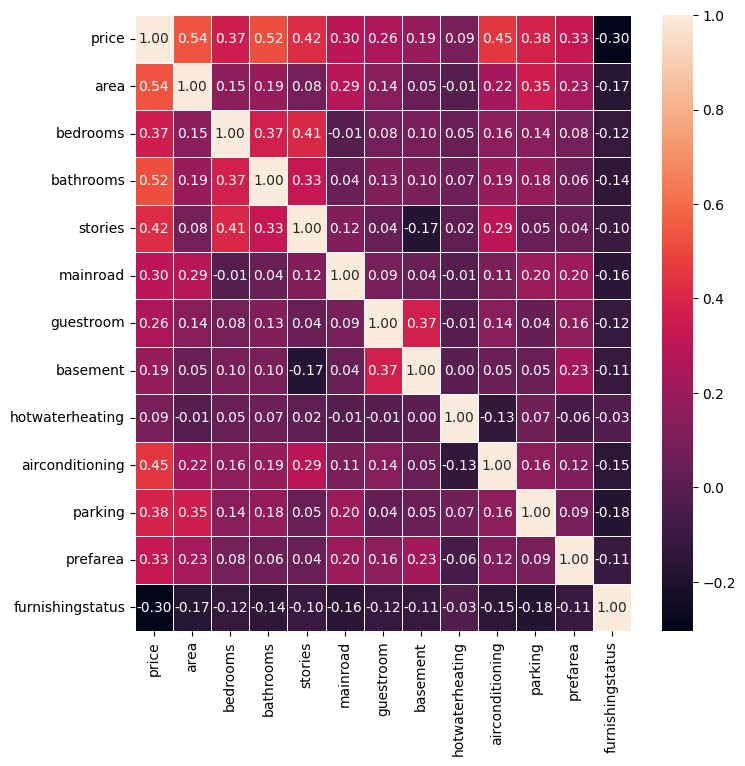

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = X.copy()
X_scaled[["area", "bedrooms", "bathrooms", "stories", "parking"]] = scaler.fit_transform(
    X_scaled[["area", "bedrooms", "bathrooms", "stories", "parking"]]
)

In [ ]:
X_scaled
y_scaled = scaler.fit_transform(df[['price']])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
import torch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
X_test_tensor

tensor([[0.2921, 0.6000, 0.3333,  ..., 0.3333, 0.0000, 2.0000],
        [0.3333, 0.4000, 0.3333,  ..., 0.0000, 1.0000, 0.0000],
        [0.1643, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.2990, 0.6000, 0.3333,  ..., 0.3333, 0.0000, 1.0000],
        [0.2990, 0.4000, 0.3333,  ..., 0.3333, 0.0000, 1.0000],
        [0.3058, 0.4000, 0.3333,  ..., 0.6667, 1.0000, 0.0000]])

Iteration 0, Loss: 3.544485569000244
Iteration 1000, Loss: 0.007393213454633951
Iteration 2000, Loss: 0.0073700412176549435
Iteration 3000, Loss: 0.007369940634816885
Train MSE: 0.007369939237833023
Test MSE: 0.012988480739295483


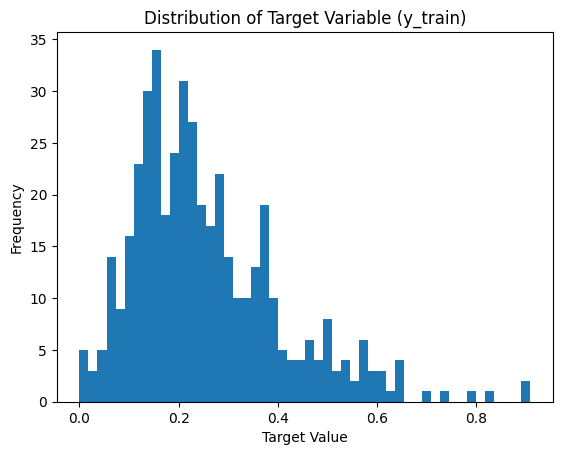

In [ ]:

theta = torch.randn(X_train_tensor.shape[1], 1, requires_grad=True)

# Learning parameters
learning_rate = 0.07  # Reduced learning rate
n_iterations = 4000

# Gradient descent with loss monitoring
for iteration in range(n_iterations):
    # Forward pass: compute predictions
    y_pred = torch.matmul(X_train_tensor, theta)

    # Calculate loss (mean squared error)
    loss = torch.mean((y_pred - y_train_tensor) ** 2)

    # Print the loss every 100 iterations
    if iteration % 1000 == 0:
        print(f"Iteration {iteration}, Loss: {loss.item()}")

    # Backward pass: compute gradients
    loss.backward()

    # Update parameters (theta) using gradient descent
    with torch.no_grad():
        theta -= learning_rate * theta.grad

    # Zero the gradients for the next iteration
    theta.grad.zero_()

# Predictions on both train and test data
y_train_pred = torch.matmul(X_train_tensor, theta)
y_test_pred = torch.matmul(X_test_tensor, theta)

# Calculate MSE on train and test sets
train_mse = torch.mean((y_train_pred - y_train_tensor) ** 2)
test_mse = torch.mean((y_test_pred - y_test_tensor) ** 2)

# Print results
print(f"Train MSE: {train_mse.item()}")
print(f"Test MSE: {test_mse.item()}")

# Visualizing the distribution of target values (for detecting outliers)
plt.hist(y_train_tensor.numpy(), bins=50)
plt.title('Distribution of Target Variable (y_train)')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
